# Phase 1 : Milestone 1

## Name : Alexander Greateine Tanaku
## Class : FTDS - 014

Objectives : Create a Classification model to predict default_payment_next_month using the dataset you have saved.

### Classification Model that will be used

1. KNN
2. Logistic Regression
3. SVM
4. Decision Tree
5. Random Forest
6. Naive Bayes
7. XGboost

## Query Data from GCP

SELECT  
limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 28014

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score
from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Ignore future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Ignore warnings for gridsearch later
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Data Loading

In [4]:
# Showing all columns
pd.set_option('display.max_columns', None) 
# Showing the Data
df = pd.read_csv('h8dsft_P1M1_Alexander_GT.csv')
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [5]:
# Viewing all column and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

## About the Data

Before we do any classification and go deep into trying to all of those machine learning models, why don't we first try to understand about the dataset. This dataset is about default payment, meaning it is a case when a person fail to pay the money that they borrow to the creditor.

1. limit balance = Amount of given credit in NT dollars (includes individual and family/supplementary credit
2. Education Level = (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
3. Sex = Gender (1=male, 2=female)
4. Marital status = (1=married, 2=single, 3=others)
5. Age = Age in years
6. pay_0 = Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above) (note: pay_0 is for September 2005 and pay_1 is for August 2005 and so on..)
7. bill_amt_1 =  Amount of bill statement in September, 2005 (NT dollar)
8. pay_amt_0 = Amount of previous payment in September, 2005 (NT dollar)
9. Default_payment_next_month (1=yes, 0=no)
10. There are 2965 number of observations and the range of observations is from April 2005 - September 2005

Another thing when I see the data is that the data is already encoded so it is easier to see the correlation later on and it speeds up the process in making the machine learning model which is great

# Exploratory Data Analysis

Make a function to show the distribution of data

In [6]:
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], kde=True,line_kws={'linewidth': 3},color = 'k', bins = 9)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

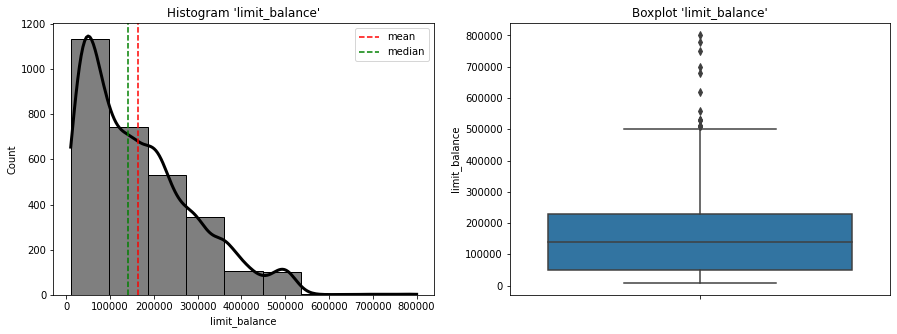

limit_balance Kurtosis: 0.7003286116778198
limit_balance Skewness: 1.0004416437793329
Columns 'limit_balance' right skewed


In [7]:
plot_dist(df,'limit_balance')

## Insight

1. Most people have limit balance of 100,000 
2. The highest limit balance is 800,000
3. This data is right skewed which means there are fewer people the higher the limit balance
4. There are several outliers but seeing the data is about credit, it is very possible some people borrow too much money and the outliers is not a problem.

See the distribution of repayment status data in September 2005

In [8]:
# Grouping based on repayment status in september
df_pay = df.groupby(by = 'pay_0').agg({'sex':'count'})
df_pay.rename(columns={"sex":"count"}, inplace = True)
df_pay

,count
pay_0,
-2.0,247
-1.0,540
0.0,1516
1.0,356
2.0,262
3.0,29
4.0,7
5.0,2
6.0,1


There are some anomalities in the data, the description that came with the dataset only explain the code -1, 1,2,3,4,5,6,7,8 and no description for 0 and -2. but data for 0 and -2 combined has the most percentage than other status of payment so lets just assume that 0 has no delay of payment and -2 is already paid just like -1 

In [9]:
df_edu = df.groupby(by = 'education_level').mean().sort_values(by = 'limit_balance', ascending = False)
df_edu

,limit_balance,sex,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
education_level,,,,,,,,,,,,,,,,,,,,,,,
4,227692.307692,1.538462,1.615385,33.153846,-0.615385,-0.846154,-0.769231,-0.846154,-0.846154,-1.000000,38997.076923,21432.538462,29348.692308,25170.461538,21228.000000,20739.000000,3735.692308,15838.769231,15885.000000,5330.384615,2908.923077,1493.230769,0.000000
1,206025.024062,1.607315,1.657363,33.749759,-0.174206,-0.343600,-0.361886,-0.388835,-0.408085,-0.421559,50343.382098,49394.797883,47716.410010,44563.497594,42212.578441,40403.628489,7264.416747,8193.642926,6233.974013,5081.520693,5822.588065,6953.128008,0.170356
0,175000.000000,1.000000,1.500000,36.000000,-1.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,15240.500000,3872.500000,6017.500000,16802.000000,0.000000,595.000000,3891.500000,6023.000000,16859.000000,0.000000,595.000000,295.000000,0.000000
5,155416.666667,1.375000,1.458333,35.041667,0.166667,-0.166667,-0.291667,-0.250000,-0.500000,-0.708333,87926.541667,75447.208333,68430.625000,55444.458333,47462.250000,37367.250000,3805.125000,12345.125000,6367.666667,5874.500000,5852.000000,11363.416667,0.041667
2,144964.285714,1.612857,1.528571,34.334286,0.109286,0.007143,-0.024286,-0.080714,-0.145714,-0.160714,54799.020714,52791.234286,49593.930714,45240.708571,41331.940000,40515.108571,5904.412143,5007.944286,4454.266429,4123.852857,4600.830000,4352.303571,0.244286
3,124409.937888,1.612836,1.445135,40.861284,0.103520,0.004141,0.024845,-0.020704,-0.024845,-0.113872,47126.453416,47123.908903,45336.455487,40077.853002,37823.159420,37351.954451,5905.803313,5274.335404,4464.140787,4675.012422,3923.763975,4862.780538,0.233954
6,62500.000000,1.250000,1.500000,33.500000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.750000,23903.750000,21966.750000,22154.250000,9588.750000,6887.500000,4508.250000,2604.500000,2973.000000,2231.250000,768.000000,608.000000,184.500000,0.500000


## Insight

There are some unique issue with the education level, the description that comes with the dataset only states the description for education level from 1 - 6 but there is education level 0 here which is an anomalities.

1. The highest limit balance is for education level 4(others) and they also have 0 default payment, maybe thats why they have such a high limit balance compared to others
2. There are more default payment from people with university education level(2) than graduate school education level(1), but this can't be very accurate because there is a possibilites that the data is imbalance.

Marriage status and late payment

I suspect that people that have been married may borrow more money than single people let's see

In [10]:
df.groupby(by = 'marital_status').agg({'limit_balance':'mean', 
                                       'age':'mean', 
                                       'education_level': pd.Series.mode,
                                       'default_payment_next_month':'count'})

,limit_balance,age,education_level,default_payment_next_month
marital_status,,,,
0,115000.000000,45.500000,3,4
1,179534.534535,39.560060,2,1332
2,151035.131744,31.361982,2,1594
3,115428.571429,42.314286,2,35


## Insight

marital_ status :(1=married, 2=single, 3=others)

1. A Married person are averagely older than single person
2. Person who marry also have the highest limit balance on average compared to other marital status
3. Married person has almost the same default payment with single person
4. the most common education level on all column except the data anomalies is 2 which mean they graduated from highschool.

Balance of Data from education level

<AxesSubplot:xlabel='education_level', ylabel='Count'>

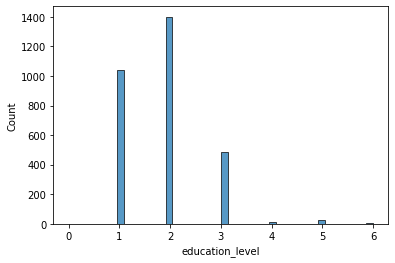

In [11]:
sns.histplot(data=df, x = 'education_level')

As expected, there are more people with education_level of 1,2,3 and for education 4,5,6 there is little to none data compared to other education level. This is a problem if I want to train the machine learning model and use education as a feature because they will only learn a little from education 4,5,6 so later in data cleaning I wil remove education level 0,2,4,5,6 and only use education level 1,2,3, I also need to use other feature because education level alone is not enough for analysis and machine learning model. The highest percentage of this data is people with education level 2 or university level, my hypothesis is because they need money for univesity and ask for a student loan to pay for their tuition.

In [12]:
df['pay_0'].unique()

array([ 0., -1.,  2.,  1.,  3., -2.,  4.,  5.,  6.,  7.,  8.])

# Feature Selection

<AxesSubplot:>

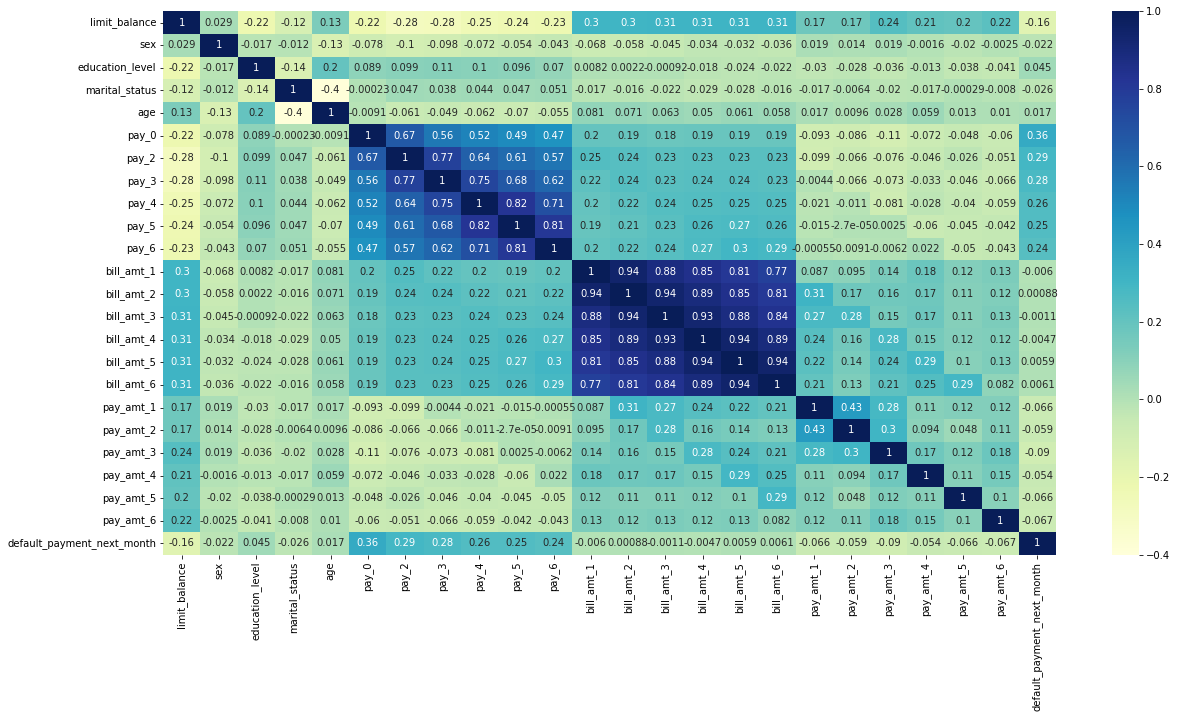

In [13]:
# Making Heatmap correlation with seaborn
# Make the size of figure bigger
fig, ax = plt.subplots(figsize=(20,10))
# Making the heatmap 
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax = ax)

## Insight
1. The heatmap show that sex has negative correlation with almost any other variables and especially pay_2 with correlation score of -0.1. 
2. bill amount have high correlation with each other compared to pay to each other.
3. The feature that affects the default payment next month quit significantly is limit_balance, pay_0 till 6 and that is the feature that I will use to train the machine learning model
4. Not as expected, education level is not greatly affecting default payment next month and since the data is also very imbalanced, I will not use education level as the feature.

## Feature 

The feature that I will use is pay_0 till 6 and pay_amt, the reason is the high correlation of pay_0 untill 6 with default payment next month and little to no correlation between pay_0 to pay_amount.

## Setting up the Data_train_test 

In [14]:
data_train_test = df[
    ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','pay_amt_1','pay_amt_2','pay_amt_3',
    'pay_amt_4','pay_amt_5','pay_amt_6','default_payment_next_month']
]
data_train_test = data_train_test.rename(columns={"pay_0":"pay_1"})
data_train_test

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,0.0,0.0,0.0,0.0,0,0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,0.0,0.0,0.0,0.0,0,0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,0.0,0.0,0.0,2.0,0,0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,0.0,0.0,0.0,0.0,0,0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,0.0,0.0,0.0,0.0,0,0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,-1.0,-1.0,-1.0,-1.0,-2,-1,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,2.0,-1.0,-1.0,-1.0,-2,-1,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,1.0,-1.0,-1.0,-1.0,-2,-2,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,1.0,-1.0,-1.0,-2.0,-2,-1,2920.0,0.0,0.0,0.0,6753.0,0.0,1


# Data Pre-Processing

### Splitting between x (features) and y (target)

In [15]:
X = data_train_test.drop('default_payment_next_month', axis = 1)
y = df['default_payment_next_month']
X.head()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.0,0.0,0.0,0.0,0,0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,0.0,0.0,0.0,0.0,0,0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,0.0,0.0,0.0,2.0,0,0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,0.0,0.0,0.0,0.0,0,0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,0.0,0.0,0.0,0.0,0,0,1367.0,1606.0,692.0,709.0,721.0,692.0


In [16]:
# Split between Train-set and Test-set

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.20, random_state = 50)

print('Train Size:', X_train.shape)
print('Test Size:', X_test.shape)

Train Size: (2372, 12)
Test Size: (593, 12)


## Checking for missing values

In [17]:
X.isnull().sum()

pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
pay_amt_1    0
pay_amt_2    0
pay_amt_3    0
pay_amt_4    0
pay_amt_5    0
pay_amt_6    0
dtype: int64

In [18]:
y.isnull().sum()

0

There are no missing value in this data so lets move on

## Outliers Handling

<AxesSubplot:>

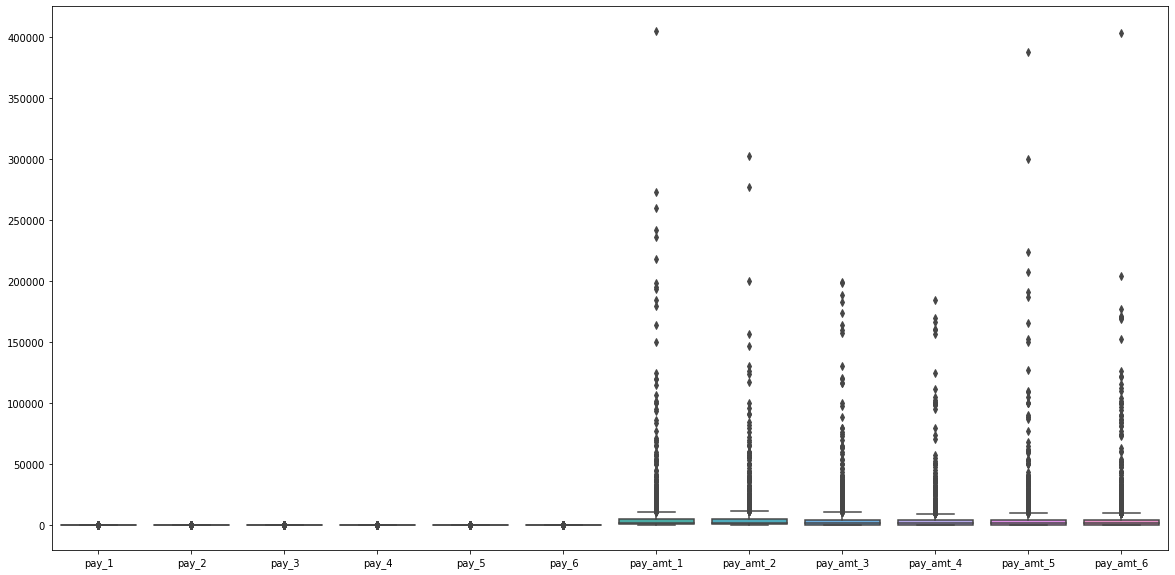

In [19]:
fig, ax2 = plt.subplots(figsize=(20,10))
sns.boxplot(data = X_train, ax = ax2)

Pay_ amt is the amount of previous payment (NT_dollar) which means that those outliers are still a real data and in my personal opinion there is no need to remove the outliers because I think that there may be some people that really do need a lot of money and decide to borrow a lot, so I think that these outliers can help describe real situation

## Splitting Numerical and Categorical Data

In [20]:
# Splitting into two columns
num_columns = X_train.iloc[:,6:].columns.tolist()
cat_columns = X_train.iloc[:,:6].columns.tolist()

In [21]:
# Make Numeric variable and categorical variable for both x_train and test
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [22]:
X_train_cat.head()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
21,0.0,0.0,0.0,-1.0,0,0
1388,0.0,0.0,0.0,0.0,2,2
567,0.0,0.0,0.0,0.0,0,0
1594,0.0,0.0,0.0,-2.0,-2,-2
1017,0.0,0.0,0.0,0.0,0,0


The categorical data have been encoded and doesn't need to be encoded again because it's already a numeric data now so the computer can already understand

In [23]:
X_train_num.head()

,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
21,77225.0,21903.0,25646.0,5080.0,0.0,5052.0
1388,2230.0,2000.0,4300.0,1000.0,0.0,2000.0
567,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0
1594,1000.0,18000.0,0.0,0.0,0.0,0.0
1017,17438.0,18852.0,16673.0,15244.0,15216.0,16037.0


Numeric data needs to be scaled

## Feature Scaling

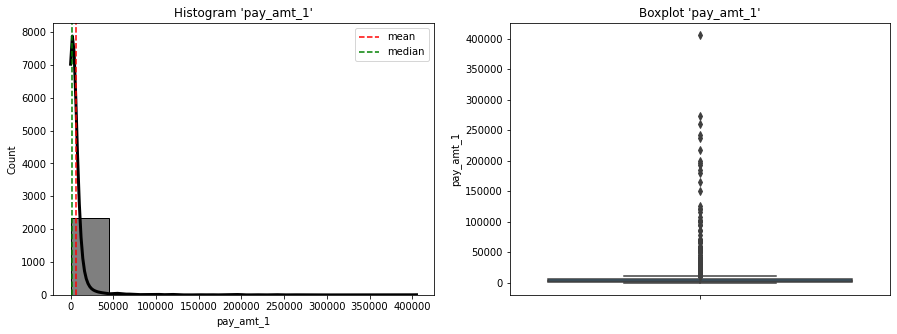

pay_amt_1 Kurtosis: 138.47893394993577
pay_amt_1 Skewness: 10.319373293082315
Columns 'pay_amt_1' right skewed


In [24]:
plot_dist(X_train_num,'pay_amt_1')

the pay amount data is very right skewed and there is a lot of outliers because I decide to factor in the outliers as data hoping to get better result

In [25]:
## Transform using Robust Scaler because there is a lot of outliers included in this data
trans = RobustScaler()
X_train_num_scaled = trans.fit_transform(X_train_num)
X_test_num_scaled = trans.transform(X_test_num)

In [26]:
# Change the data types into pandas Dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = num_columns)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = num_columns)

## Feature Encoding

Since the data is already encoded, there is no need to do encoding

In [27]:
X_train_cat

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
21,0.0,0.0,0.0,-1.0,0,0
1388,0.0,0.0,0.0,0.0,2,2
567,0.0,0.0,0.0,0.0,0,0
1594,0.0,0.0,0.0,-2.0,-2,-2
1017,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...
2014,1.0,-2.0,-1.0,-1.0,-1,-1
2157,-2.0,-2.0,-2.0,-2.0,-2,-2
1931,2.0,2.0,7.0,7.0,7,7
1504,-1.0,0.0,0.0,0.0,-1,0


In [28]:
X_train_cat.reset_index(drop = True, inplace = True)
X_test_cat.reset_index(drop = True, inplace = True)

## Combining Data

In [29]:
X_train_final = pd.concat([X_train_cat,X_train_num_scaled], axis=1)
X_test_final = pd.concat([X_test_cat,X_test_num_scaled], axis=1)

In [30]:
X_train_final

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.0,0.0,0.0,-1.0,0,0,18.525458,4.714838,5.716543,0.954137,-0.412451,0.882469
1,0.0,0.0,0.0,0.0,2,2,0.011603,-0.023689,0.567035,-0.156369,-0.412451,0.103947
2,0.0,0.0,0.0,0.0,0,0,0.201691,0.690554,0.132803,0.251905,0.489785,21.786238
3,0.0,0.0,0.0,-2.0,-2,-2,-0.292045,3.785608,-0.470297,-0.428552,-0.412451,-0.406224
4,0.0,0.0,0.0,0.0,0,0,3.765969,3.988453,3.551897,3.720604,3.509957,3.684586
...,...,...,...,...,...,...,...,...,...,...,...,...
2367,1.0,-2.0,-1.0,-1.0,-1,-1,-0.538913,-0.047497,1.317532,0.088596,-0.412451,-0.406224
2368,-2.0,-2.0,-2.0,-2.0,-2,-2,0.255755,0.291054,0.167782,-0.143032,-0.033769,0.484025
2369,2.0,2.0,7.0,7.0,7,7,-0.538913,-0.499851,-0.470297,-0.428552,-0.412451,-0.406224
2370,-1.0,0.0,0.0,0.0,-1,0,-0.235018,-0.199393,-0.229057,10.027354,0.618676,0.614119


## Cross Validation

In [31]:
# Make a Loop to try and see all model cross value score and choosing the best model from it
for model in ([
    LogisticRegression(), 
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    SGDClassifier(),
    RidgeClassifier()
]):
    score = cross_val_score(model, X_train_final, y_train, cv=5, scoring = 'accuracy').mean()
    std_dev = cross_val_score(model, X_train_final, y_train, cv=5, scoring = 'accuracy').std()
    print(f' model {model} has the cross_val score mean of', score)
    print(f' model {model} has the cross_val score standard deviation of', std_dev)
    print('-'*15)

 model LogisticRegression() has the cross_val score mean of 0.8406422385076615
 model LogisticRegression() has the cross_val score standard deviation of 0.010274879329249571
---------------
 model SVC() has the cross_val score mean of 0.8296842105263158
 model SVC() has the cross_val score standard deviation of 0.01534972405221832
---------------
 model DecisionTreeClassifier() has the cross_val score mean of 0.7365249833444371
 model DecisionTreeClassifier() has the cross_val score standard deviation of 0.015003233184004452
---------------
 model RandomForestClassifier() has the cross_val score mean of 0.834753719742394
 model RandomForestClassifier() has the cross_val score standard deviation of 0.016728993650185826
---------------
 model KNeighborsClassifier() has the cross_val score mean of 0.8115549633577614
 model KNeighborsClassifier() has the cross_val score standard deviation of 0.018371475606599953
---------------
 model GaussianNB() has the cross_val score mean of 0.44898778

## Insight 

1. Logistic Regression has the best cross validation score from 5 kfold and lowest standard deviation amongst all, this is because of the advantages of logistic regression that can predict binary classification well and the feature is independent, since I use 2 features which is pay amount and classification of how late one pays their credit card and both of it are independent, this model works well.
2. Gaussian NB has low scores because of the feature that are not normally distributed and still have outliers
3. AdaBoostClassifier has scores that is very similar with logistic regression but logistic regression still performs well because of higher score and lower standard deviation.
4. I can't say for sure that logistic regression is better than ada boost since the difference is too little, they have a  similar cross_val score

## Model Prediction Evaluation before gridsearch

In [32]:
log_reg = LogisticRegression()           ## Define Model   
log_reg.fit(X_train_final, y_train)   ## Train model

y_pred_test = log_reg.predict(X_test_final) ## test with test result
y_pred_train = log_reg.predict(X_train_final)

print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  0.8393760539629005
accuracy score test :  0.8111298482293423


In [33]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       464
           1       0.64      0.30      0.41       129

    accuracy                           0.81       593
   macro avg       0.74      0.63      0.65       593
weighted avg       0.79      0.81      0.78       593



I still got a pretty good accuracy with 81% and its also a good fit because the difference is not too big between train result and test result. The precision and recall of class 1 is bad, this could be a problem if this models is used to detect which customer will default to pay. In other words, this model predict True Positive better than True negative. 

In [34]:
roc_auc_score(y_test, y_pred_test)

0.6274558941459503

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.678


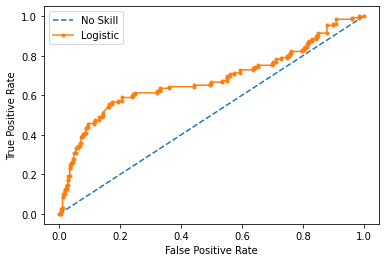

In [35]:
from sklearn.metrics import roc_curve
ns_probs = [0 for _ in range(len(y_test))]


lr_probs = log_reg.predict_proba(X_test_final)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

This is the Score of AUC before there are any hyperparameter tuning, AUC score of 1 means perfect model and 0 being bad, the auc score of 0.62 is still not a good score because its still below 0.7 . This model is far from being a perfect model, although the accuracy score is good, but this graph has shown that this model still have a lot of mistake and far from being 1. the graph of 1 is the perfect classifier and with even with no model and just guessing the probability of getting right is 50% but with this logistic model the probability is 0.678. there are still more rooms for improvement for this model.

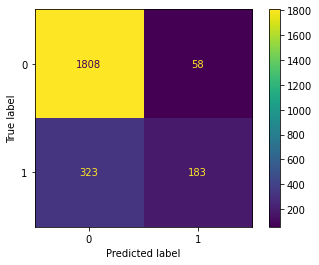

In [36]:
cm = confusion_matrix(y_train, y_pred_train, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)

disp.plot()
plt.show()

This is the confusion matrix for the training data, the training data is highly imbalanced because the true label of training class 1 is only 323 and class 0 of 1808 so ofcourse the Machine learns to classify category 0 better than 1, the result is biased and the roc score is not good

## Gridsearch 

In [37]:
## Make a Parameter Grid for Grid Search
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : (0.001, 0.01, 0.1, 1, 10 , 100, 1000),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga','none'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]


1. C is for reducing the variance of the model
2. Solver figures out what the coefficient should be used in model
3. max_iter is for how many object passed in one iteration
4. Penalty is for regularization method

In [38]:
## Preparing the Gridsearch and inputting the model, param_grid 
classifier = GridSearchCV(log_reg, param_grid = param_grid,cv = 5, verbose=True, n_jobs=-1)
# n_jobs -1 for parallel computation to shorten the loading time
# cv is for crossvalue fits
# param_grid is for parameter used
# log_reg is the model used which is logistic regression

In [39]:
# Fitting the classifier to train data and find the best parameter for this data
best_classifier = classifier.fit(X_train_final,y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


In [40]:
# See the best estimator
best_classifier.best_estimator_

LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='sag')

In [41]:
# Checking the accuracy of tuned model
print (f'Accuracy - : {best_classifier.score(X_train_final,y_train):.3f}')

Accuracy - : 0.839


In [42]:
## Make the model based on best parameters according to gridsearch
log_reg_tuned = LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='sag')
log_reg_tuned.fit (X_train_final, y_train)

y_pred_test_tune = log_reg_tuned.predict(X_test_final)
y_pred_train_tune =  log_reg_tuned.predict(X_train_final)

In [43]:
# Checking auc score from the tuned model
roc_auc_score(y_test, y_pred_test_tune)

0.6274558941459503

## Insight

1. After Tuning the result of accuracy remains the same as before tuning, this may be the result because of our model which is logistic regression and the type of feature that I choose
2. My feature is amount paid and the status of payment which is unrelated to each other and that could possibly the caused of unchanged accuracy
3. The unchanged score of auc and accuracy maybe means that the default logistic regression is already the best parameters or the feature have linear correlation with target so it doesn't change anything after tuning

# Conclusion

1. Married person are more likely to have higher limit balance
2. Some people borrow too much money and be the outliers of the data, it is shown through the pay amount
3. Average people who borrow money is a well educated person
4. Data collection is still bad because there are some category left undescribed in this dataset
5. The Logistic Regression model in this analysis has no difference after grid search hyper parameter tuning in result
6. Target data is imbalanced resulting in poor prediction
7. There are still more room for improvements for the machine learning model

# Conceptual Problems

1. What is the function of the criteria parameter in the Decision Tree? explain one of the criteria that you understand!
2. What is the function of pruning in the Tree model?
3. How to choose the optimal K on KNN?
4. Explain what you know about Cross Validation!
5. Explain what you know about Accuracy, Precision, Recall, F1 Score

## Answers

1. Criterion parameter in Decision Tree is a parameter which let you choose on how to calculate the inheritance rule, one of the critera I understand is gini. gini in criteria parameter calculate the root node and the inheritance based on the gini impurity, the root node must be a feature which have the lowest gini impurity.

2. Decision Tree tends to overfit the training data and when the test data comes in, the result accuracy is not very good because machine learning only trains to the training data. Tree pruning is a way to prevent the overfitting of data by cutting a branch in a decision tree. Tree pruning could be done by calculating the SSR of each leaf and calculating the total tree score with SSR * tree complexity penalty. the tree complexity penalty is from cross validation times number of leaves

3. Simple, to choose the optimal number of K or n neighbors is by trial and error with Gridsearch cross validation and choose the best result and hyperparameters

4. Cross validation is a solution to the problem in choosing the best model by restructuring which part of the data is the train and which part is the test data and check the accuracy of each different fold by how many times this process loops.

5. Answer
- Accuracy : True positive + True Negative divided by total data, this accuracy score means how many of the prediction is the correct prediction or True Positive and True negative
- Recall : True Positive divided by True positive + False Negative, Recall is a missed positive prediction
- Precision : True Positive divided by True Positive + False Positive, Precision is fraction of positive prediction that are correct
- F1 score : Weighted Average of precision and recall, F1 score is equal to harmonic mean of precision and recall

